<a href="https://colab.research.google.com/github/uditgaur3/RPI/blob/main/Traffic_Sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
import cv2
from sklearn.model_selection import train_test_split
import os
import sys
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import tensorflow as tf
from PIL import Image
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

print(tf.__version__)
print(cv2.__version__)
print(keras.__version__)
print(np.__version__)
print(pd.__version__)
print(sys.version)

2.17.0
4.10.0
3.4.1
1.26.4
2.2.2
3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [3]:
#import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/Dataset.zip
!unzip /content/Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/5/5_13245_1577672002.0768187.png  
  inflating: Dataset/5/5_13246_1577672002.0768187.png  
  inflating: Dataset/5/5_13247_1577672002.0778143.png  
  inflating: Dataset/5/5_13248_1577672002.078812.png  
  inflating: Dataset/5/5_13249_1577672002.0798092.png  
  inflating: Dataset/5/5_13250_1577672002.0798092.png  
  inflating: Dataset/5/5_13251_1577672002.0808067.png  
  inflating: Dataset/5/5_13252_1577672002.0818043.png  
  inflating: Dataset/5/5_13253_1577672002.082801.png  
  inflating: Dataset/5/5_13254_1577672002.082801.png  
  inflating: Dataset/5/5_13255_1577672002.0837986.png  
  inflating: Dataset/5/5_13256_1577672002.084796.png  
  inflating: Dataset/5/5_13257_1577672002.0857933.png  
  inflating: Dataset/5/5_13258_1577672002.0857933.png  
  inflating: Dataset/5/5_13259_1577672002.0867918.png  
  inflating: Dataset/5/5_13260_1577672002.0877888.png  
  inflating: Dataset/5/5_13261_1577672002.0887861.png  
 

# data collection

In [ ]:
path = "/content/Dataset"
# labelFile = '/content/labels.csv'
labelFile = '/content/drive/MyDrive/labels.csv'

imageDimesions = (32,32,3)
testRatio = 0.2
validationRatio = 0.2

# making partition of data in the ratios of 60 + 20 + 20 as train, validation and test resp

In [ ]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


In [5]:
# assigning names to the classes
classes = {
   0: 'Speed Limit 20 km/h',
   1: 'Speed Limit 30 km/h',
   2: 'Speed Limit 50 km/h',
   3: 'Speed Limit 60 km/h',
   4: 'Speed Limit 70 km/h',
   5: 'Speed Limit 80 km/h',
   6: 'End of Speed Limit 80 km/h',
   7: 'Speed Limit 100 km/h',
   8: 'Speed Limit 120 km/h',
   9: 'No passing',
   10: 'No passing for vechiles over 3.5 metric tons',
   11: 'Right-of-way at the next intersection',
   12: 'Priority road',
   13: 'Yield',
   14: 'Stop',
   15: 'No vechiles',
   16: 'Vechiles over 3.5 metric tons prohibited',
   17: 'No entry',
   18: 'General caution',
   19: 'Dangerous curve to the left',
   20: 'Dangerous curve to the right',
   21: 'Double curve',
   22: 'Bumpy road',
   23: 'Slippery road',
   24: 'Road narrows on the right',
   25: 'Road work',
   26: 'Traffic signals',
   27: 'Pedestrians',
   28: 'Children crossing',
   29: 'Bicycles crossing',
   30: 'Beware of ice/snow',
   31: 'Wild animals crossing',
   32: 'End of all speed and passing limits',
   33: 'Turn right ahead',
   34: 'Turn left ahead',
   35: 'Ahead only',
   36: 'Go straight or right',
   37: 'Go straight or left',
   38: 'Keep right',
   39: 'Keep left',
   40: 'Roundabout mandatory',
   41: 'End of no passing',
   42: 'End of no passing by vechiles over 3.5 metric tons' }

# Visualizing the Data

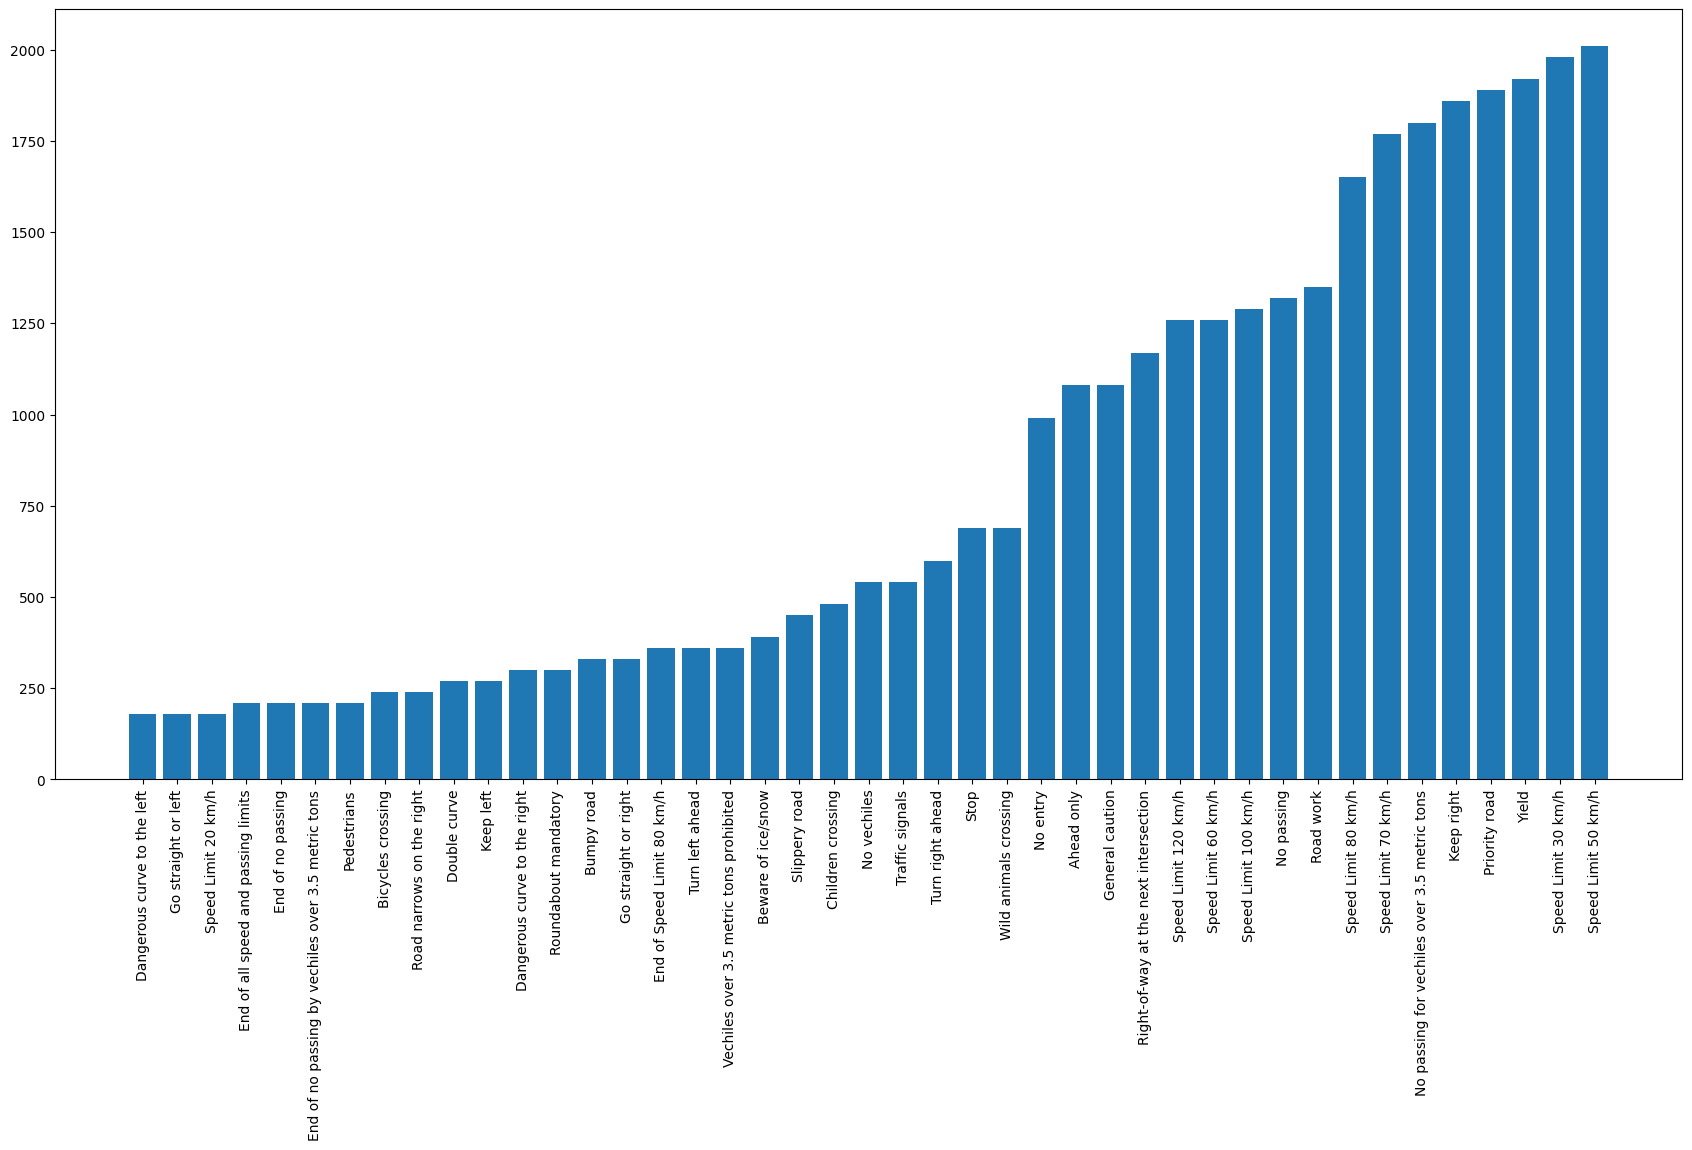

In [ ]:
folders = os.listdir(path)
train_path = path
train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)


print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


In [ ]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

num_of_samples = []
cols = 5
num_classes = noOfClasses

def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))


X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

data shape  (58, 2) <class 'pandas.core.frame.DataFrame'>


In [ ]:
dataGen= ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)


y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

# Creating the Model

In [ ]:
####################################

def myModel():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(60, (5, 5), input_shape=(imageDimesions[0], imageDimesions[1], 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Block
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Reduced Dropout (just one after Flatten layer)
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))  # Retain only one dropout layer

    # Output layer with softmax activation
    model.add(Dense(noOfClasses, activation='softmax'))

    # Compile model with Adam optimizer and categorical crossentropy loss
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = myModel()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 60)          │             240 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 60)          │             240 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 10, 30)          │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 30)            │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 500)                 │           2,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 380,743 (1.45 MB)

 Trainable params: 379,383 (1.45 MB)

 Non-trainable params: 1,360 (5.31 KB)

None


In [ ]:
####################################

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Training configuration
batch_size_val = 50
epochs_val = 30  # Increased epochs for better training
history = model.fit(
    dataGen.flow(X_train, y_train, batch_size=batch_size_val),
    steps_per_epoch=len(X_train) // batch_size_val,
    epochs=epochs_val,
    validation_data=(X_validation, y_validation),
    callbacks=[early_stop, reduce_lr],
    shuffle=True
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


445/445 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.3518 - loss: 2.7796 - val_accuracy: 0.4113 - val_loss: 2.1851 - learning_rate: 0.0010
Epoch 2/30
  1/445 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7200 - loss: 0.6886

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7200 - loss: 0.6886 - val_accuracy: 0.4124 - val_loss: 2.2659 - learning_rate: 0.0010
Epoch 3/30
445/445 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.7802 - loss: 0.7122 - val_accuracy: 0.9506 - val_loss: 0.1520 - learning_rate: 0.0010
Epoch 4/30
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9400 - loss: 0.2156 - val_accuracy: 0.9247 - val_loss: 0.2163 - learning_rate: 0.0010
Epoch 5/30
445/445 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.8811 - loss: 0.3845 - val_accuracy: 0.9587 - val_loss: 0.1268 - learning_rate: 0.0010
Epoch 6/30
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.9600 - loss: 0.1181 - val_accuracy: 0.9494 - val_loss: 0.1608 - learning_rate: 0.0010
Epoch 7/30
445/445 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9111 - loss: 0.2818 - val_accuracy: 0.9731 - val_loss: 0.0753 - learning_rate: 0.0010
Epoch 8/30
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.9600 - loss: 0.1460 -

In [ ]:
def myModel():
    model= Sequential()
    model.add((Conv2D(60,(5,5),input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))
    model.add((Conv2D(60, (5,5), activation='relu')))
    # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add((Conv2D(30, (3,3),activation='relu')))
    model.add((Conv2D(30, (3,3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
    opt = keras.optimizers.SGD(learning_rate=lr_schedule)
    # pass optimizer by name: default parameters will be used
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    # model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])
    # model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model = myModel()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None


# Training

In [ ]:
batch_size_val=50
epochs_val= 25
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=len(X_train)//32,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=8)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


441/695 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.1271 - loss: 3.2594

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


695/695 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.1738 - loss: 3.0594 - val_accuracy: 0.7516 - val_loss: 0.9485
Epoch 2/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.5585 - loss: 1.4428 - val_accuracy: 0.8996 - val_loss: 0.3970
Epoch 3/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.7109 - loss: 0.9197 - val_accuracy: 0.9481 - val_loss: 0.1969
Epoch 4/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7784 - loss: 0.7066 - val_accuracy: 0.9664 - val_loss: 0.1538
Epoch 5/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8240 - loss: 0.5596 - val_accuracy: 0.9720 - val_loss: 0.1056
Epoch 6/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8532 - loss: 0.4758 - val_accuracy: 0.9772 - val_loss: 0.0773
Epoch 7/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8696 - loss: 0.4220 - val_accuracy: 0.9835 - val_loss: 0.0658
Epoch 8/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8779 - loss: 0.3853 - val_accurac

# Visualising accuracy and loss of the model

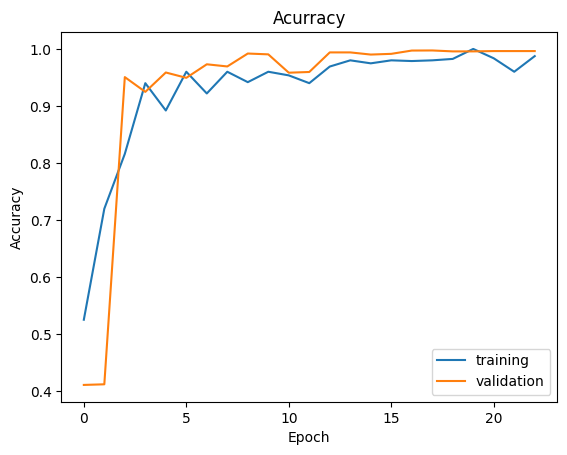

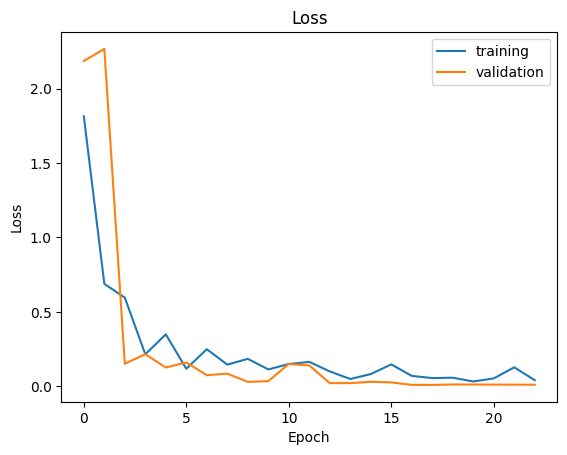

Test Score: 0.012292006053030491
Test Accuracy: 0.9972701072692871


In [ ]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

# Saving the Model

In [ ]:
Root = "/content/drive/MyDrive"
os.chdir(Root)
model.save('model2.h5')
#model.save('final_model.keras')

## CONVERTING TENSORFLOW MODEL TO TENSORFLOW LITE

In [ ]:
# Convert the model.
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
# with open('final_model.tflite', 'wb') as f:
with open('model2.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpwbv_h_5r'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 43), dtype=tf.float32, name=None)
Captures:
  132270276629376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132267757682208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132267580383728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132267580385840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132267580388832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132267580389008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132267578787440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132267578792016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132267578787264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132267578795536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132267578788320

## TESTING TF LITE MODEL

In [6]:
# Load the TFLite model
def load_tflite_model(model_path):
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    return interpreter

# Prepare input data
def prepare_input_data(image_path, input_shape):
    # Load and preprocess the image
    image = Image.open(image_path)

    # Convert to grayscale if the model expects a single channel
    if input_shape[3] == 1:  # Model expects grayscale
        image = image.convert('L')  # Convert to grayscale
    else:  # Model expects RGB
        image = image.convert('RGB')

    # Resize to model input shape
    image = image.resize((input_shape[2], input_shape[1]))

    # Normalize the image
    image_array = np.array(image, dtype=np.float32) / 255.0  # Normalize to [0, 1]

    # Add batch and channel dimensions (shape: [1, height, width, channels])
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    if input_shape[3] == 1:  # If the model expects a single channel
        image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension

    return image_array

# Run inference
def run_inference(interpreter, input_data):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Invoke the interpreter
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data

# Convert output to class label
def get_prediction(output_data):
    predicted_class = np.argmax(output_data, axis=1)
    return predicted_class

# Display random image and retrieve class label
def get_random_image_from_random_folder(base_path):
    # List all directories in the base path
    folders = [f.path for f in os.scandir(base_path) if f.is_dir()]

    if not folders:
        print("No folders found in the given path.")
        return None, None

    # Select a random folder
    random_folder = random.choice(folders)
    input_class = os.path.basename(random_folder)  # The class number is the folder name

    # List all image files in the selected folder
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']
    images = [f for f in os.listdir(random_folder) if os.path.splitext(f)[1].lower() in image_extensions]

    if not images:
        print(f"No images found in the folder: {random_folder}")
        return None, None

    # Select a random image
    random_image = random.choice(images)
    return os.path.join(random_folder, random_image), int(input_class)


<ipython-input-12-4b2951cc1b5e>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(get_prediction(output_data))


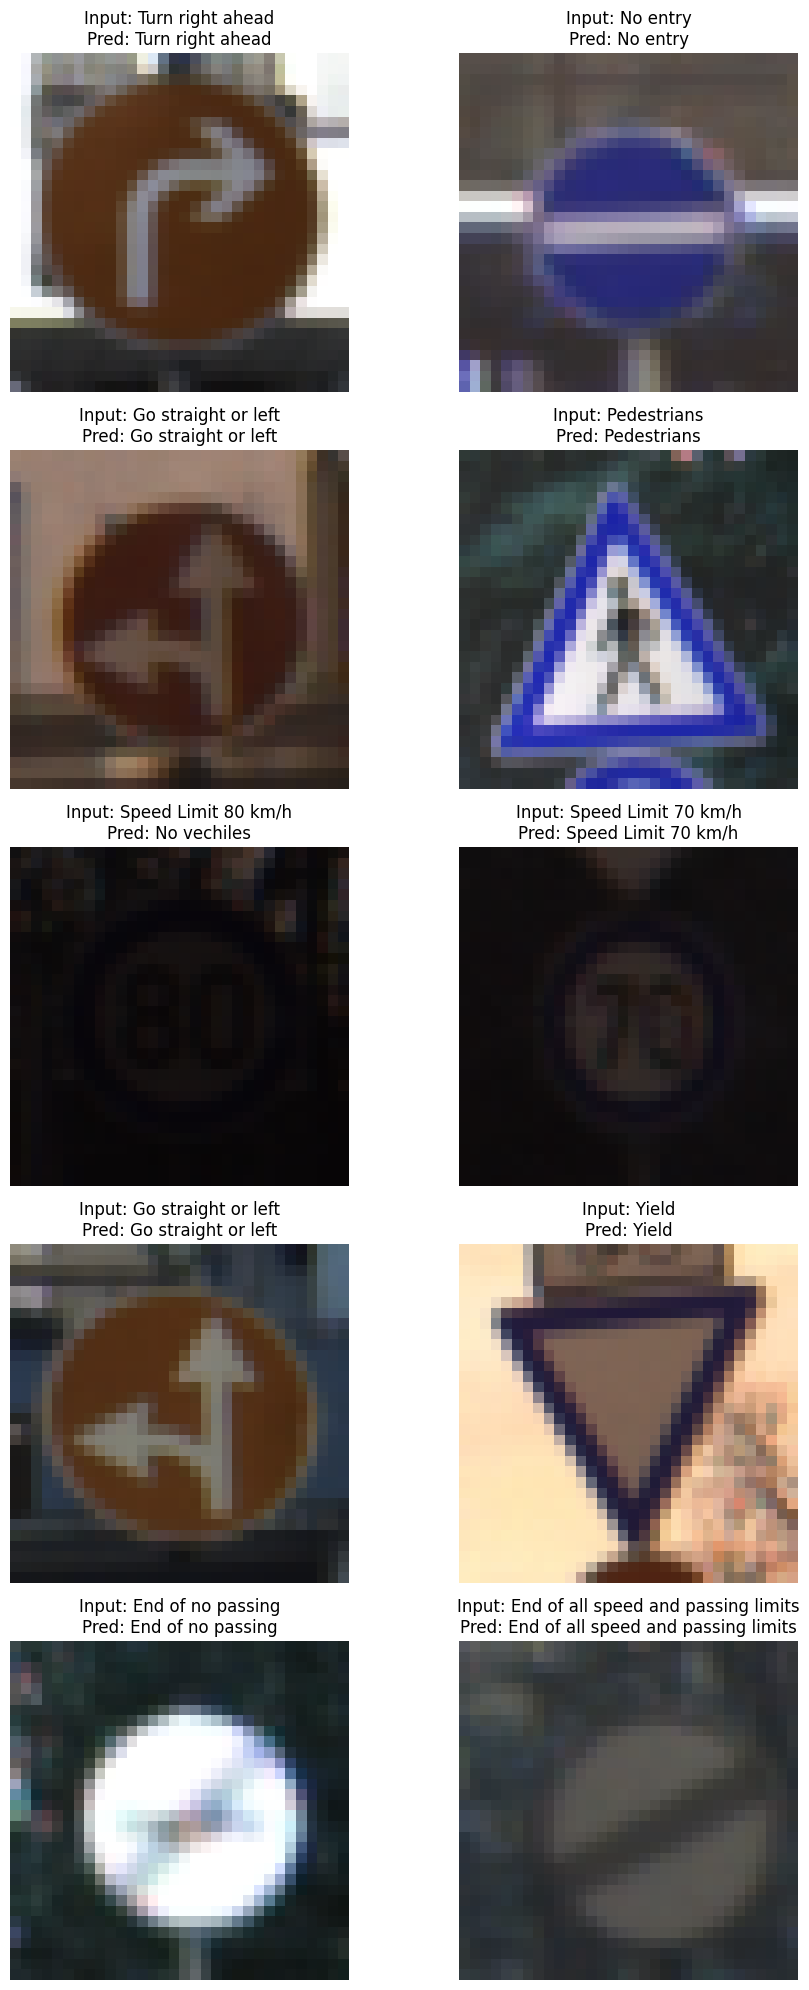

In [12]:
# Path to your TFLite model and input image
base_path = '/content/Dataset'  # Replace with your base path
image_path, input_class = get_random_image_from_random_folder(base_path)

# Load the model
model_path = '/content/drive/MyDrive/model2.tflite'  # Replace with your model path
interpreter = load_tflite_model(model_path)

# Specify number of images to test simultaneously
num_images = 10

# Get input shape details
input_details = interpreter.get_input_details()
input_shape = input_details[0]['shape']

# List to store results for table display with images
results = []
images = []

# Number of images to display (adjust according to the 5x2 grid)
num_images = 10

# Loop through multiple images
for i in range(num_images):
    image_path, input_class = get_random_image_from_random_folder(base_path)
    if image_path is None:
        print("No valid image found, skipping.")
        continue

    # Prepare input data
    input_data = prepare_input_data(image_path, input_shape)

    # Run inference
    output_data = run_inference(interpreter, input_data)

    # Get predicted class
    predicted_class = int(get_prediction(output_data))

    # Append results and image for display
    results.append({
        "Image #": i+1,
        "Input Class #": input_class,
        "Input Class Name": classes[input_class],
        "Predicted Class #": predicted_class,
        "Predicted Class Name": classes[predicted_class]
    })
    images.append(image_path)  # Save image paths to display them

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Display images in a 5x2 grid
fig, axes = plt.subplots(5, 2, figsize=(10, 20))  # 5 rows, 2 columns
axes = axes.flatten()  # Flatten to make indexing easier

for idx, image_path in enumerate(images):
    img = load_img(image_path)
    axes[idx].imshow(img)
    axes[idx].axis("off")
    axes[idx].set_title(f"Input: {results[idx]['Input Class Name']}\nPred: {results[idx]['Predicted Class Name']}")

plt.tight_layout()
plt.show()
